In [15]:
import numpy as np
from PolymerCpp.helpers import getCppWLC2D
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
def plot_polymer(coordinate):
    x, y = [], []
    for i in coordinate:
        x.append(i[0])
        y.append(i[1])
    plt.plot(x, y, '-o')
    plt.show()

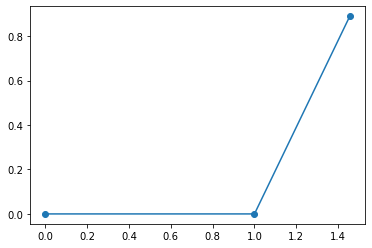

In [22]:
plot_polymer(np.array([first, second, third]))

how to compute orientation
the answer is slope
Assume we have three points: p1,p2,p3
and the slope between p1p2 and s1 ,between p2p3 and s2
if s1 > s2: the orientation is clockwise
if s1 < s2: the orientation is counterclockwise
otherwise: no orientation

$$s_{1} = \dfrac{y_{2} - y_{1}}{x_{2} - x_{1}}$$

$$s_{2} = \dfrac{y_{3} - y_{2}}{x_{3} - x_{2}}$$

$$s_{2} - s_{1} = \dfrac{y_{2} - y_{1}}{x_{2} - x_{1}} - \dfrac{y_{3} - y_{2}}{x_{3} - x_{2}}$$

$$s_{2} - s_{1} = (y_{2} - y_{1})(x_{3} - x_{2}) - (y_{3} - y_{2})(x_{2} - x_{1})$$


In [38]:
def orientation(p_1, p_2, p_3):
    val = (p_2[1] - p_1[1]) * (p_3[0] - p_2[0]) - (p_3[1] - p_2[1]) * (p_2[0] - p_1[0])
    if val > 0: # clockwise
        return 1
    elif val < 0: #counterclockwise
        return 2
    else: # parallel
        return 0

def do_intersect(p1,p2,q1,q2):
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)
    if (o1 != o2) and (o3 != o4):
        return True
    # # Special Cases
    # # p1 , q1 and p2 are collinear and p2 lies on segment p1q1
    # if o1 == 0:
    #     return True
    # # p1 , q1 and q2 are collinear and q2 lies on segment p1q1
    # if o2 == 0:
    #     return True
    # # p2 , q2 and p1 are collinear and p1 lies on segment p2q2
    # if o3 == 0:
    #     return True
    # # p2 , q2 and q1 are collinear and q1 lies on segment p2q2
    # if o4 == 0:
    #     return True
    # If none of the cases
    return False

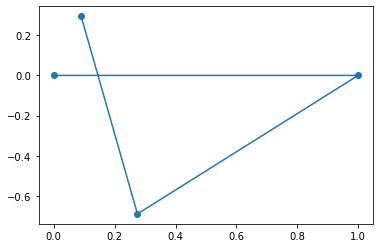

In [36]:
# first monomer
first = np.array([0,0])
# second monomer
second = np.array([1,0])
cumulate = 0
# third monomer
angle = np.random.uniform(-np.pi, np.pi, 1)
cumulate += angle
third = np.array([second[0] + np.sin(cumulate), second[1] + np.cos(cumulate)]).reshape(2,)
# fourth
angle = np.random.uniform(-np.pi, np.pi, 1)
cumulate += angle
fourth = np.array([third[0] + np.sin(cumulate), third[1] + np.cos(cumulate)]).reshape(2,)
coordinates = np.array([first,second,third,fourth])
plot_polymer(coordinates)

In [39]:
print(do_intersect(first,second,third,fourth))

False
